In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv("/home/ubuntu/TE_39/Social_Network_Ads.csv")

In [6]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
dataset.duplicated().sum()

0

In [9]:
mapi = {'Male':1,'Female':0}
dataset = dataset.replace(mapi)
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [10]:
dataset.drop(['User ID'],axis=1,inplace=True)
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [11]:
x, y = dataset.drop(['Purchased'], axis=1), dataset['Purchased']

In [12]:
from sklearn.model_selection import train_test_split
xstrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25,random_state=0)

In [13]:
from sklearn.preprocessing import StandardScaler
sc_scale = StandardScaler()

In [14]:
xstrain = sc_scale.fit_transform(xstrain)
xtest = sc_scale.transform(xtest)

In [15]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)

In [16]:
classifier.fit(xstrain,ytrain)

LogisticRegression(random_state=0)

In [17]:
y_pred = classifier.predict(xtest)

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,y_pred)
print("Confusion Matrix : \n",cm)

Confusion Matrix : 
 [[65  3]
 [ 7 25]]


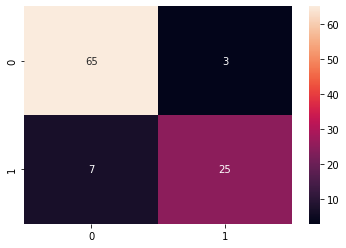

In [20]:
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.show()

In [21]:
from sklearn.metrics import accuracy_score
print("Accuracy : ", accuracy_score(ytest,y_pred)*100, '%')

Accuracy :  90.0 %


In [22]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [23]:
#precision = tp /(tp + fp)
precision = precision_score(ytest,y_pred)
print('Precision : %f' % precision)
#recall= tp/(tp + fn)
recall = recall_score(ytest,y_pred)
print('Recall : %f' % recall)
#f1 = 2 tp / (2 tp + fp + fn)
f1 = f1_score(ytest,y_pred)
print('F1 score: %f' %f1)

Precision : 0.892857
Recall : 0.781250
F1 score: 0.833333
